In [1]:
#Je commence par importer les bibliothèques que je vais utiliser dans ce projet
##Pour travailler mes données
import pandas as pd
import numpy as np
##Pour représenter graphiquement les données
import matplotlib.pyplot as plt
import seaborn as sns
##Pour réaliser des statistiques
import statistics

In [2]:
#Je commence par récupérer les documents .xlsx du projet. Afin de pouvoir les consulter avec jupyter lab, je les convertis au format .csv

##Le document ERP.xlsx
###Le document .xlsx est lu
read_file = pd.read_excel ("ERP.xlsx")
###Le document .xlsx est transformé en .csv
read_file.to_csv ("ERP.csv", index = None, header=True)
###Le document .csv est lu
données_erp = pd.DataFrame(pd.read_csv("ERP.csv"))
###On affiche les 5 premières valeurs afin de s'assurer que les opérations se sont bien passées
données_erp.head(5)

C:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [3]:
###Pour retrouver les dimensions de notre dataframe
données_erp.shape

(825, 5)

In [4]:
###Le dataframe est de dimension 825 lignes et 5 colonnes

In [5]:
###Je regarde les informations concernant ce document
données_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [6]:
####Aucune valeur nulles pour les différentes variables du dataframe "données_erp" 

In [7]:
###Je regarde si on peux se servir de l'élément "product_id" comme clé primaire (existe t-il des doublons?)
données_erp.loc[données_erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [8]:
###Autre méthode pour déterminer si il y a des doublons
données_erp.duplicated('product_id').sum()

0

In [9]:
####Aucuns doublons pour "product_id" ==> je pourrai m'en servir par la suite comme clé primaire

In [10]:
##J'execute le meme traitement pour les autres documents : Web.xlsx
read_file = pd.read_excel ("Web.xlsx")
read_file.to_csv ("Web.csv", index = None, header=True)
données_web = pd.DataFrame(pd.read_csv("Web.csv"))
données_web.head(5)

C:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
données_web.shape

(1513, 28)

In [12]:
###Je regarde les informations concernant ce document
données_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [13]:
####Je constate un problème : le "sku", qui est censé etre un nombre est, ici, de type "object" ==>transformer cette colonne en type "numérique"

In [14]:
###Je regarde si il existe des doublons pour la colonne "sku"
données_web.loc[données_web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [15]:
### 2 lignes n'ont pas de valeurs absentes, mais des valeurs "atypiques", je décide de les comptabilisées dans le dataframe final.
### Pour cela, je remplace leurs "sku" par des valeurs qui pourront convenir (en m'assurant que ces valeurs du sku ne sont pas déja attribuées à d'autres produits)
données_web['sku']= données_web['sku'].replace("bon-cadeau-25-euros","1")
données_web['sku']= données_web['sku'].replace("13127-1","2")

In [16]:
####Je constate que toutes les valeurs de "sku" possèdent des doublons. Je me renseigne sur quel paramètre repose ces doublons.
####Je vérifie avec un numéro "sku"
données_web_15298 = données_web.loc[données_web["sku"] == "15298"]
données_web_15298

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [17]:
####Je constate que le doublon est présent avec la caractéristique "post_type" du document ==> Je décide de ne garder
####que les lignes avec un post_type = produit
données_web_sans_doublons = données_web.loc[données_web["post_type"] == "product"]
données_web_sans_doublons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    714 non-null    object 
 1   virtual                716 non-null    int64  
 2   downloadable           716 non-null    int64  
 3   rating_count           716 non-null    int64  
 4   average_rating         716 non-null    float64
 5   total_sales            716 non-null    float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            716 non-null    float64
 9   post_date              716 non-null    object 
 10  post_date_gmt          716 non-null    object 
 11  post_content           0 non-null      float64
 12  post_title             716 non-null    object 
 13  post_excerpt           716 non-null    object 
 14  post_status            716 non-null    object 
 15  commen

In [20]:
####Je constate que la colonne "sku" comporte 2 valeurs nulle ==>Je vais les affichers
données_web_sans_doublons.loc[données_web_sans_doublons['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [21]:
####Celles-ci disparaitront au moment de la fusion des différentes tables

In [22]:
####Je transforme le type de la colonne "sku" en "numérique"
données_web_sans_doublons.loc[données_web_sans_doublons["sku"].isna(), "sku"]=0
données_web_sans_doublons["sku"] = pd.to_numeric(données_web_sans_doublons["sku"], errors='coerce')
données_web_sans_doublons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    716 non-null    int64  
 1   virtual                716 non-null    int64  
 2   downloadable           716 non-null    int64  
 3   rating_count           716 non-null    int64  
 4   average_rating         716 non-null    float64
 5   total_sales            716 non-null    float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            716 non-null    float64
 9   post_date              716 non-null    object 
 10  post_date_gmt          716 non-null    object 
 11  post_content           0 non-null      float64
 12  post_title             716 non-null    object 
 13  post_excerpt           716 non-null    object 
 14  post_status            716 non-null    object 
 15  commen

C:\Users\Thomas\AppData\Local\Temp\ipykernel_14760\3252116464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  données_web_sans_doublons["sku"] = pd.to_numeric(données_web_sans_doublons["sku"], errors='coerce')


In [23]:
##J'execute à nouveau le meme traitement pour le dernier document : liaison.xlsx
read_file = pd.read_excel ("liaison.xlsx")
read_file.to_csv ("liaison.csv", index = None, header=True)
liaison = pd.DataFrame(pd.read_csv("liaison.csv"))
liaison.shape

C:\Users\Thomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(825, 2)

In [24]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [55]:
###Je n'oublie pas de remplacer les valeurs "bon-cadeau-25-euros" et "13127-1" afin de correspondre au document "donnée_web"
liaison['id_web']= liaison['id_web'].replace("bon-cadeau-25-euros","1")
liaison['id_web']= liaison['id_web'].replace("13127-1","2")

In [27]:
###Je constate le type de l'objet "id_web" n'est pas le bon. 
###Il manque des équivalences entre product_id et id_web

In [28]:
###Je commence par convertir la colonne "id_web" en numérique
liaison["id_web"] = pd.to_numeric(liaison["id_web"], errors='coerce')
###Je créé un nouveau tableau ou ne seront plus présentes les lignes avec une valeur égale à 0
liaison.loc[liaison["id_web"].isna(), "id_web"]=0
liaison_bis = liaison[liaison["id_web"] != 0.0]
liaison_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  733 non-null    int64  
 1   id_web      733 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [29]:
###Comme précisé dans l'énoncé, je remplace "id_web" par "sku"
liaison_bis.rename(columns={"id_web": "sku"}, inplace=True)
liaison_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  733 non-null    int64  
 1   sku         733 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14760\2328729332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liaison_bis.rename(columns={"id_web": "sku"}, inplace=True)


In [30]:
###Je m'assure de pouvoir utiliser "product_id" comme clé primaire
liaison_bis.loc[liaison_bis['product_id'].duplicated(keep=False),:]

,product_id,sku


In [31]:
####Toutes les données des documents sont prètes pour la création du tableau final

In [32]:
###Je commence par créer une première jointure entre ERP.csv et liaison.csv
erp_liaison = pd.merge(liaison_bis, données_erp, on = "product_id")

In [33]:
###Je créé une autre jointure entre ma dataframe précédente et le document Web.csv
erp_liaison_web = pd.merge(erp_liaison, données_web_sans_doublons, on = "sku")
erp_liaison_web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             714 non-null    int64  
 1   sku                    714 non-null    float64
 2   onsale_web             714 non-null    int64  
 3   price                  714 non-null    float64
 4   stock_quantity         714 non-null    int64  
 5   stock_status           714 non-null    object 
 6   virtual                714 non-null    int64  
 7   downloadable           714 non-null    int64  
 8   rating_count           714 non-null    int64  
 9   average_rating         714 non-null    float64
 10  total_sales            714 non-null    float64
 11  tax_status             714 non-null    object 
 12  tax_class              0 non-null      float64
 13  post_author            714 non-null    float64
 14  post_date              714 non-null    object 
 15  post_d

In [34]:
erp_liaison_web.head(5)

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298.0,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,15296.0,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,15300.0,1,20.8,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,19814.0,1,14.1,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,19815.0,1,46.0,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [35]:
####Nous avons bien notre tableau final sans aucuns doublons

In [36]:
##Nous pouvons maintenant calculer le chiffre d'affaire de chaque produit
erp_liaison_web["Chiffre_Affaire"] = erp_liaison_web["price"]*erp_liaison_web["total_sales"]
erp_liaison_web

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,Chiffre_Affaire
0,3847,15298.0,1,24.2,0,outofstock,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,15296.0,1,34.3,0,outofstock,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,15300.0,1,20.8,0,outofstock,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,19814.0,1,14.1,0,outofstock,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,19815.0,1,46.0,0,outofstock,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,6930,16135.0,1,8.4,83,instock,0,0,0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.0
710,7023,15891.0,1,27.5,15,instock,0,0,0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
711,7025,15887.0,1,69.0,2,instock,0,0,0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
712,7247,2.0,1,54.8,23,instock,0,0,0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [37]:
##Nous pouvons calculer le chiffre d'affaire total
chiffre_affaire_total = erp_liaison_web["Chiffre_Affaire"].sum()
print("Le chiffre d'affaire total de l'entreprise est de :", chiffre_affaire_total, "euros")

Le chiffre d'affaire total de l'entreprise est de : 70568.6 euros


In [38]:
##Nous pouvons maintenant nous intéresser à d'éventuels valeurs abhérentes au sein de ce tableau
##Nous utiliserons pour cela l'outil "boite à moustache"

In [39]:
###Nous commençons par représenter à travers un graphique type "histogramme" la répartition du pris des produits
####Je précise les axes des abscisses de notre futur graphique
graphique_nuage_point_abscisse = erp_liaison_web["price"]

C:\Users\Thomas\AppData\Local\Temp\ipykernel_14760\772027703.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


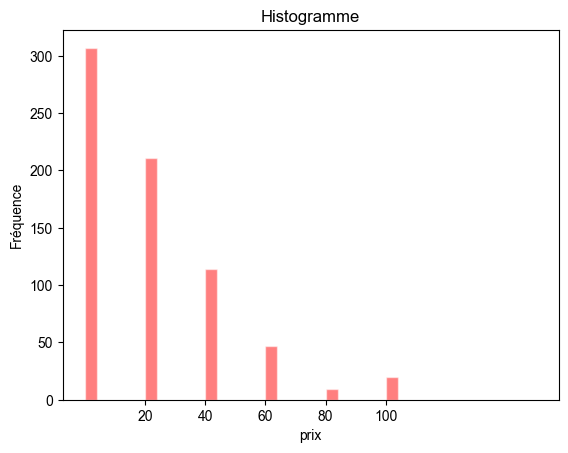

In [40]:
####Je créé l'histogramme
plt.hist(graphique_nuage_point_abscisse,bins=[0,20,40,60,80,100,150], width = 4, edgecolor = 'white', alpha=0.5, color='red')
plt.xticks([20,40,60,80,100])
plt.title('Histogramme')
plt.xlabel('prix')
plt.ylabel('Fréquence')
plt.style.use('seaborn-ticks')
plt.show()

In [41]:
####Je constate que plus le produit est cher, moin il y en as.

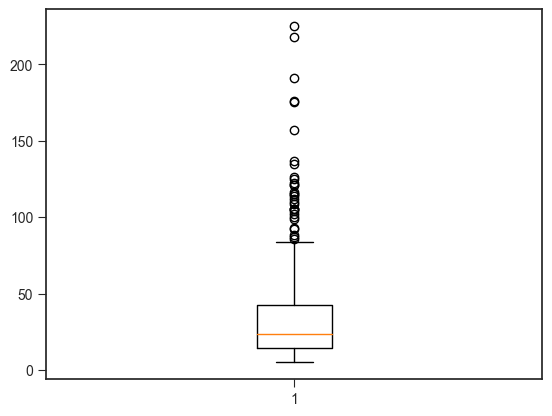

In [42]:
##J'utilise l'outil boxplot afin d'obtenir une représentation des prix de type "boite à moustache"
plt.boxplot(graphique_nuage_point_abscisse)
plt.show()

In [43]:
####Nous pouvons maintenant déterminer les valeurs abhérentes de nos données avec la formule : 
#### Q3 +/- 1.5*(Q3 - Q1)
valeur_mediane = statistics.median(graphique_nuage_point_abscisse)
quartil_1 = np.quantile(graphique_nuage_point_abscisse, .25)
quartil_3 = np.quantile(graphique_nuage_point_abscisse, .75)
ecart_inter_quartil = quartil_3 - quartil_1
print("la valeur médiane de notre liste est :",valeur_mediane, "euros")
print("la valeur du Q1 est de : ", quartil_1,"euros")
print("la valeur du Q3 est de : ", quartil_3,"euros")
print("la valeur inter-quartil est égale à :", ecart_inter_quartil)

la valeur médiane de notre liste est : 23.55 euros
la valeur du Q1 est de :  14.1 euros
la valeur du Q3 est de :  42.175000000000004 euros
la valeur inter-quartil est égale à : 28.075000000000003


In [44]:
###Calcul de la borne inférieure
borne_inférieure = quartil_1 - (1.5*ecart_inter_quartil)
print("La borne inférieure pour les valeurs abhérentes est : ",borne_inférieure)

La borne inférieure pour les valeurs abhérentes est :  -28.012500000000003


In [45]:
####Aucuns prix dans notre tableau "erp_liaison_web" n'est négatif ==> Pas de valeurs abhérentes inférieures

In [46]:
###Calcul de la borne supérieure
borne_superieure = quartil_3 + (1.5*ecart_inter_quartil)
print("La borne supérieure pour les valeurs abhérentes est : ",borne_superieure)

La borne supérieure pour les valeurs abhérentes est :  84.28750000000001


In [47]:
####Nous pouvons maintenant afficher la liste des produits dont le prix est trop élevé
liste_produits_prix_abhérents = erp_liaison_web.loc[erp_liaison_web["price"] > borne_superieure]

In [48]:
liste_produi_reduit = liste_produits_prix_abhérents[["product_id", "sku", "post_title","price"]]

In [49]:
liste_produi_reduit

,product_id,sku,post_title,price
63,4115,15382.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,100.0
65,4132,11668.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,88.4
199,4352,15940.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0
201,4355,12589.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5
205,4359,13853.0,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6
218,4402,3510.0,Cognac Frapin VIP XO,176.0
219,4404,3507.0,Cognac Frapin Château de Fontpinot XO,108.5
221,4406,7819.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0
222,4407,3509.0,Cognac Frapin Cigar Blend,104.0
227,4582,12857.0,Château de Meursault Puligny-Montrachet 1er Cr...,109.6


In [50]:
####Nous avons 32 produits soupçonnés d'avoir des prix trop élevés

In [51]:
###Je vais calculer le poucentage que représente les prix abhérents par rapport au chiffre d'affaire total
chiffre_affaire_prix_abhérents = liste_produits_prix_abhérents["Chiffre_Affaire"].sum()
pourcentage_CA_prix_abhérents = (chiffre_affaire_prix_abhérents / chiffre_affaire_total)*100
print("Le total du CA avec les prix abhérents est :",chiffre_affaire_prix_abhérents, "euros" )
print("Le pourcentage du chiffre d'affaire correspondant aux prix abhérents est :", pourcentage_CA_prix_abhérents, "%")

Le total du CA avec les prix abhérents est : 6970.0 euros
Le pourcentage du chiffre d'affaire correspondant aux prix abhérents est : 9.876914094937407 %


In [52]:
####Je vais calculer le chiffre d'affaire sans les abhérations
chiffre_affaire_sans_abheration = chiffre_affaire_total - chiffre_affaire_prix_abhérents
print("Le chiffre d'affaire sans les abhérations est de :", chiffre_affaire_sans_abheration, "euros")

Le chiffre d'affaire sans les abhérations est de : 63598.600000000006 euros


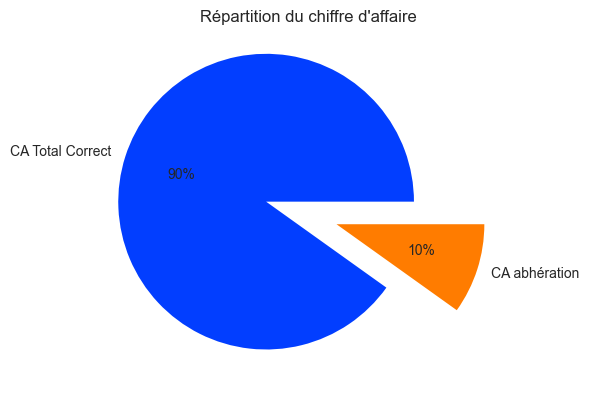

In [53]:
####Je vais réaliser un diagramme "camembert" pour constater le pourcentage du chiffre d'affaire que représente les prix abhérents
data = [chiffre_affaire_sans_abheration, chiffre_affaire_prix_abhérents]
       
explode = [0.3, 0.2]
labels = ['CA Total Correct', 'CA abhération']
colors = sns.color_palette('bright')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)
plt.title("Répartition du chiffre d'affaire")
plt.show()

In [54]:
####Conclusion : Les prix abhérents ne le sont pas forcément (un bon champagne coute cher, de meme pour un cognac)
#### ==>Valeur atypiques